<a href="https://colab.research.google.com/github/tlyonsWIT/Mathematical-Methods/blob/main/Mathematical%20Methods%20-%20Workbook%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematical Methods - Python Workbook 5

## B Sc (H) Applied Computing - Year 2  

# South East Technological University - Waterford

---
 

# Topic 3 - Matrices, eigenvalues and eigenvectors

## Items Covered:

1. Interpreting $2\times 2$ matrices in 2D

2. The __eigenvalues__ of $2\times2$ matrices

3. The __eigenvectors__ of $2\times2$ matrices



## Calling the python libraries and functions


* In the cell below the necessary Python libraries and functions are imported, which will be needed for the current work book


In [ ]:
import matplotlib.pyplot as plt  ## Library of functions for 2D plotting
import numpy as np ## Library of function for numerical work

from mpl_toolkits.mplot3d import Axes3D # Import the functions for creating 3D plots

from ipywidgets import widgets, interact, interactive, fixed, interact_manual # Import widgets for interactive plots
from IPython.display import clear_output # A function to clear interactive plots before each update

from matplotlib import animation # A function to create an animation
from IPython.display import HTML # For creating HTML animation whcih can be displayed directly in the browser / Colab notebook

from scipy.linalg import eig  # Import the scipy function for calculating eigenvalues and eigenvectors

## Some useful function definitions

### __v2d(a,b)__

* A function for creating 2D-vectors

In [ ]:
def v2d(a,b):
    return np.array([a,b])

### __M2(a,b,c,d)__
A function to create a __2x2 matrix__ of the form
$$
\begin{bmatrix}
a & b \\ c & d
\end{bmatrix}
$$

In [ ]:
def M2(a,b,c,d):
    return np.array([[a , b] , [c , d]])

__norm(u)__

A function to calculate the norm of a 2D vector $\vec{u}$

In [ ]:
def norm(u):
    return np.sqrt(u.dot(u))

### __Rtn(t)__
A function the create a rotation vector with __t__ a rotation angle in __degrees__

In [ ]:
def Rtn(t):
    r=np.radians(t)
    c=np.cos(r)
    s=np.sin(r)
    return np.array([[c , -s] , [s , c]])

---

# Item 1 - Interpreting vectors in 2D

* Given a matrix of the form
$$
\mathbf{M} = \begin{bmatrix} a & b \\ c & d\end{bmatrix}
$$
and a 2D vector of the form
$$
\vec{u} = \begin{bmatrix} u_{1} \\ u_{2}\end{bmatrix}
$$
we can form the new vector
$$
\vec{v} = \mathbf{M}.\vec{u} 
= 
\begin{bmatrix} a & b \\ c & d\end{bmatrix}
\begin{bmatrix} u_{1} \\ u_{2} \end{bmatrix}
=
\begin{bmatrix}
a u_{1} + b u_{2} \\ c u_{1} + d u_{2}
\end{bmatrix}
$$

\\

* The effect of this multiplication is usually to stretch (or shrink) the matrix $\vec{u}$ to the vector $\vec{v}$

\\

* There are exceptions to this interpretation, for instance, the __eigenvectors__ of the matrix __M__ are only re-scaled by the matrix multiplication


\\

* There are also matrices of the form
$$
\mathbf{R} = 
\begin{bmatrix} 
\cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta)
\end{bmatrix}
$$
which __rotates__ the vector __$\vec{u}$__ by an angle $\theta$

## __Example__ 1

Given the matrices
$$
\mathbf{M} =
\begin{bmatrix}
-1 & 3 \\ 2 & 1
\end{bmatrix}
\qquad 
R = 
\begin{bmatrix}
\cos(45) & -\sin(45) \\ \sin(45) & \cos(45)
\end{bmatrix}
$$
and the vector $\vec{u} = \begin{bmatrix} 2 \\ 5\end{bmatrix}$

\\

__i)__ Calculate the matrices $\vec{v}=\mathbf{M}.\vec{u}$ and $\vec{w} = \mathbf{R}.\vec{u}$

__ii)__ Plot the vectors $\vec{u}$, $\vec{v}$ and $\vec{w}$

### __Solution__ 

__Part i)__

* The vector $\vec{u}$ is created with __v2d()__, while the matrix $\mathbf{M}$ is created using __M2()__ and the rotation matrix $\mathbf{R}$ is created using __Rtn()__

In [ ]:
u=v2d(2,5)
u

array([2, 5])

In [ ]:
M=M2(-1,3,2,1)
M

array([[-1,  3],
       [ 2,  1]])

In [ ]:
R=Rtn(45)
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

* The matrices $\vec{v}$ and $\vec{w}$ are created using the __dot()__ function

In [ ]:
v = M.dot(u)
v

array([13,  9])

In [ ]:
w = R.dot(u)
w

array([-2.12132034,  4.94974747])

__Part ii)__

* The plot of the three vectors is created using the __plt.quiver()__ function

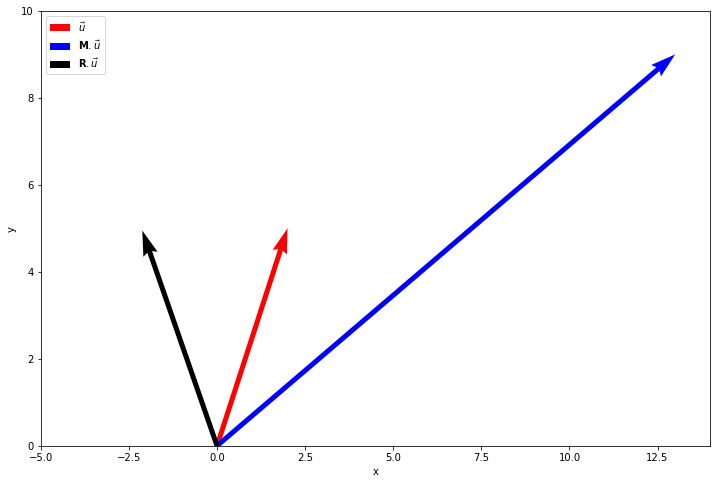

In [ ]:
plt.figure(figsize=(12 , 8))

plt.quiver(0, 0, u[0], u[1], color = 'red' , label='$\\vec{u}$',scale_units='xy',scale=1,angles='xy')
plt.quiver(0, 0, v[0], v[1], color = 'blue' , label='$\mathbf{M}.\\vec{u}$',scale_units='xy',scale=1,angles='xy')
plt.quiver(0, 0, w[0], w[1], color = 'k' , label='$\mathbf{R}.\\vec{u}$',scale_units='xy',scale=1,angles='xy')


plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-5,14)
plt.ylim(0,10)

plt.legend(loc='upper left')

## _Exercise_ 1

Given the matrices
$$
\mathbf{A} = 
\begin{bmatrix}
2 & -4 \\ 1 & 3
\end{bmatrix}
\qquad 
\mathbf{B}
=
\begin{bmatrix}
3 & 2 \\ -2 & 3
\end{bmatrix}
$$
and the vector 
$$
\vec{p} = 
\begin{bmatrix}
-1 \\ 3
\end{bmatrix}
$$
asnwer the following:



__i)__ Find the vectors $\vec{u}=\mathbf{A}.\vec{p}$ and $\vec{v}=\mathbf{B}.\vec{p}$

__ii)__ Now find the vectors $\mathbf{B}.\vec{u}$ and $\mathbf{A}.\vec{v}$

__iii)__ Use __==__ to cheeck if $\mathbf{B}.\vec{u} = \mathbf{A}.\vec{v}$

__iv)__ Plot the vectors $\mathbf{B}.\vec{u}$ and $\mathbf{A}.\vec{v}$. 

\\

__NOTE:__ This means you are really plotting $\mathbf{BA}.\vec{p}$ and $\mathbf{AB}.\vec{p}$, they should not be the same vector. This follows from the fact that the matrix products $\mathbf{AB}$ and $\mathbf{BA}$ are not the same matrix


---

# Item 2 - Eigenvalues of a matrix

* Given a matrix
$$
\mathbf{M} = 
\begin{bmatrix}
 a & b \\ c & d
\end{bmatrix}
$$
the __characteristic polynomial (C.P.)__ of this matrix is given by the determinant
$$
p(\lambda) = 
\begin{Vmatrix}
 a - \lambda & b \\ c & d - \lambda
\end{Vmatrix}
$$

\\

* The __eigenvalues__ of the matrix $M$ are the roots of this polynomial, i.e. the solutions of $p(\lambda) = 0$

\\

* While __numpy__ does not deal directly with symbolic representations of polynomials, we can still use the function __np.poly()__ to construct the characteristic polynomial of a matrix in terms of the coefficients of that polynomial

## __Example__ 2

__i)__ Given the matrix
$$
J = 
\begin{bmatrix}
 2 & -4 \\ 3 & 5
\end{bmatrix}
$$
find the characteristic ploynomial of __J__ using the function __np.poly()__

__NOTE:__ The characteristic polynomial is 
$$
p(\lambda) = 
\begin{bmatrix}
2 - \lambda & -4 \\ 3 & 5 - \lambda
\end{bmatrix}
 = (2-\lambda)(5-\lambda) -(-4)(3) = \lambda^2 - 7\lambda + 22
$$
The __coefficients__ of this polynomial are __(1, -7, 22)__

\\

__ii)__ Now use the function __np.solve()__ to find the solutions of this polynomial, in other words you will also find the __eigenvalues__ of __J__

\\



### __Solution__

__i)__  First we define the matrix __J__ using the function __M2()__

In [ ]:
J = M2(2, -4, 3, 5)
J

array([[ 2, -4],
       [ 3,  5]])

* The __coefficients__ of the characteristic polynomial are now given by 

In [ ]:
PJ = np.poly(J)
PJ

array([ 1., -7., 22.])

__ii)__ The solutions (roots) of the polynomial are 
$$
\lambda = \frac{-(-7) \pm \sqrt{(-7)^2 -4 (1)(22)}}{2} = \frac{7 \pm \sqrt{-29}}{2}
$$
__NOTE:__ These are __complex__ roots since we are taking the square root of a negative number, which is fairly common with matrices

* To calculate these roots directly, we can use the __np.root()__ function to calculate the roots of the polynomial with coefficients __PJ__ which applies the quadratic formula directly to __(1, -7, 22)__

In [ ]:
np.roots(PJ)

array([3.5+3.122499j, 3.5-3.122499j])

* The eigenvalues of __J__ are 
$$
\lambda_{1} = 3.5+3.122499j \qquad \lambda_{2} = 3.5-3.122499j 
$$
where $j=\sqrt{-1}$ is the __imaginary unit__ i.e. $j^2 =-1$


* This means the matrix __J__ has no real-valued __eigenvectors__


* Another way to understand this is the matrix __J__ will __always__ rotate any real-valued vector $\vec{u}$, it will never just stretch it like the matrices & eigenvectors we saw during lectures

## _Exercise_ 2

Given the rotation matrix
$$
\mathbf{K} 
= 
\begin{bmatrix}
\cos(35.5) & -\sin(35.5) \\ \sin(35.5) & \cos(35.5)
\end{bmatrix}
$$
which rotates a vector by $35.5^\circ$, answer the following:

__i)__ Use the function __Rtn()__ to define the matrix __K__ above

__ii)__ Find the __characteristic polynomial__ of __K__

__iii)__ Find the roots of this characteristic polynomial i.e. the eigenvalues of __K__

\\

__NOTE:__ You should find the eigenvalues of __K__ are complex numbers, meaning __K__ will always rotate a real vector, as it should since it is a rotation matrix. Every rotation matrix has complex eigenvalues

---

# Item 3 - Eigenvectors of a Matrix

* While __np.poly()__ and __np.roots()__ are useful functions when we are looking for the eigenvalues of a matrix, they are not helpful when we want the corresponding eigenvectors

\\

* The __eigenvalues__ and __eigenvectors__ of a matrix can all be calculated directly using the __scipy__ (__sci__entific __py__thon) function __eig()__

\\

* This function will calculate the eigenvalues and eigenvectors in one large array, so the important thing to understand is how to extract each of them separately using the __index [ ]__ of the output

## __Example__ 3

Given the matrix
$$
\mathbf{H} = 
\begin{bmatrix}
4 & 1 \\ 2 & 5
\end{bmatrix}
$$
answer the following:

__i)__ Use the function __M2()__ to create this matrix


__ii)__ Use the function __eig()__ to find the eigenvalues and eigenvectors of the matrix $\mathbf{H}$

__iii)__ Use the index notation __[ ]__ to extract each of the eigenvalues and eigenvectors separately. Check that the eigenvectors have __norm__ 1, these are called __normalized eigenvectors__


__iv)__ Check the __truth values__ of the equations 
$$
\mathbf{H}.\vec{u} = \lambda\vec{u}
$$
for each of the eigenvalues and corresponding eigenvectors


__v)__ Plot each of the eigenvectors $\vec{u}$ and $\vec{v}$ and the vectors $\mathbf{H}.\vec{u}$ and $\mathbf{H}.\vec{v}$  using __plt.quiver()__

### __Solution__

__i)__ The matrix is given by

In [ ]:
H = M2(4, 1, 2, 5)
H

array([[4, 1],
       [2, 5]])

__ii)__ The eigenvalues and eigenvectors are given by

In [ ]:
EH=eig(H)
EH

(array([3.+0.j, 6.+0.j]), array([[-0.70710678, -0.4472136 ],
        [ 0.70710678, -0.89442719]]))

__iii)__

* We see that we have an array of arrays.


* The __first array__ is the list of __eigenvalues__, which we extract as follows

In [ ]:
EH[0]

array([3.+0.j, 6.+0.j])

* We can extract the individual eigenvalues as follows

In [ ]:
l1,l2=EH[0]

In [ ]:
l1

(3+0j)

In [ ]:
l2

(6+0j)

* The __second array__ is the __eigenvector__ corresponding to __l1__ and is extracted as follows

In [ ]:
u=EH[1][:,0]
u

array([-0.70710678,  0.70710678])

* __EXPLANATION:__ The indices in __EH[1][:,0]__  mean the following -

    * __EH[1]__ returns the __2x2__ matrix which is made up of the two eigenvectors:

In [ ]:
EH[1]

array([[-0.70710678, -0.4472136 ],
       [ 0.70710678, -0.89442719]])

* The first __column__ of this __2x2__ matrix is the first eigenvector with eigenvalue __l1__

* We extract it using __[:,0]__ where __0__ indicate we use the first column and __:__ means use all entries in this column, so this eigenvector is

In [ ]:
u = EH[1][:,0]
u

array([-0.70710678,  0.70710678])

* The remaining __eigenvector__ corresponding to the eigenvalue __l2__ is similarly given by

In [ ]:
v=EH[1][:,1]
v

array([-0.4472136 , -0.89442719])

* The norms of these eigenvectors are 

In [ ]:
norm(u) ,norm(v)

(0.9999999999999999, 0.9999999999999999)

* The function __eig()__ always returns normalised eigenvectors  

__iii)__ We check the eigenvalue equations are true using __==__

In [ ]:
H.dot(u)==l1*u

array([ True,  True])

In [ ]:
H.dot(v)==l2*v

array([ True,  True])

__v)__ 

* To make things easier to type we will use the following notation

In [ ]:
Hu=H.dot(u)
Hv=H.dot(v)

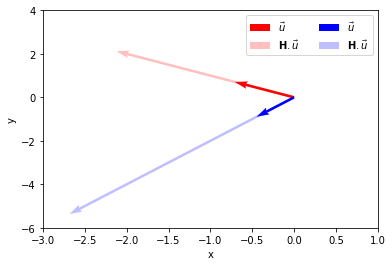

In [ ]:
plt.quiver(0, 0, u[0], u[1], scale_units='xy', angles='xy', scale=1, label='$\\vec{u}$',color='red')
plt.quiver(0, 0, Hu[0], Hu[1], scale_units='xy', angles='xy', scale=1, label='$\\mathbf{H}.\\vec{u}$',color='red',alpha=0.25)

plt.quiver(0, 0, v[0], v[1], scale_units='xy', angles='xy', scale=1, label='$\\vec{u}$',color='blue')
plt.quiver(0, 0, Hv[0], Hv[1], scale_units='xy', angles='xy', scale=1, label='$\\mathbf{H}.\\vec{u}$',color='blue',alpha=0.25)

plt.xlim(-3,1)
plt.ylim(-6,4)

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='upper right', ncol=2)

* As we can see from the plot, __H__ just stretches the eigenvectors __u__ and __v__ as expected

## _Exercise_ 3

Given the matrix
$$
\mathbf{U} = 
\begin{bmatrix}
3 & -1 \\ -1 & 5
\end{bmatrix}
$$
answer the following:

__i)__ Use the function __M2()__ to create this matrix


__ii)__ Use the function __eig()__ to find the eigenvalues and eigenvectors of the matrix $\mathbf{U}$

__iii)__ Use the index notation __[ ]__ to extract each of the eigenvalues and eigenvectors separately. Check that the eigenvectors have __norm__ 1, these are called __normalised eigenvectors__


__iv)__ Check the __truth values__ of the equations 
$$
\mathbf{U}.\vec{u} = \lambda\vec{u}
$$
for each of the eigenvalues and corresponding eigenvectors


__v)__ Plot each of the eigenvectors $\vec{u}$ and $\vec{v}$ and the vectors $\mathbf{U}.\vec{u}$ and $\mathbf{U}.\vec{v}$  using __plt.quiver()__